<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module2-loadingdata/LS_DS4_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [7]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
flag_data = pd.read_csv(flag_data_url)

In [9]:
# Step 3 - verify we've got *something*
flag_data.head()

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [10]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [11]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  89647      0 --:--:-- --:--:-- --:--:-- 90177
    194     194   15240


In [37]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv()

In [0]:
??pd.read_csv

In [38]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
print(flag_data.shape)
flag_data.head()

(194, 30)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [39]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [40]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

In [41]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.names

1. TItle: Flag database

2. Source Information
   -- Creators: Collected primarily from the "Collins Gem Guide to Flags":
      Collins Publishers (1986).
   -- Donor: Richard S. Forsyth 
             8 Grosvenor Avenue
             Mapperley Park
             Nottingham NG3 5DX
             0602-621676
   -- Date: 5/15/1990

3. Past Usage:
   -- None known other than what is shown in Forsyth's PC/BEAGLE User's Guide.

4. Relevant Information:
   -- This data file contains details of various nations and their flags.
      In this file the fields are separated by spaces (not commas).  With
      this data you can try things like predicting the religion of a country
      from its size and the colours in its flag.  
   -- 10 attributes are numeric-valued.  The remainder are either Boolean-
      or nominal-valued.

5. Number of Instances: 194

6. Number of attributes: 30 (overall)

7. Attribute Information:
   1. name	Name of the country concerned
   2. landmass	1=N.America, 2=S.America,

In [42]:
# Pandas Display Options
pd.set_option('display.max_columns', 500)

column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
           'religion', 'bars', 'stripes', 'colors', 'red', 'green', 'blue', 
           'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 
           'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 
           'animate', 'text', 'topleft', 'botright']

# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None, names=column_headers)
print(flag_data.shape)
flag_data.head()

(194, 30)


,name,landmass,zone,area,population,language,religion,bars,stripes,colors,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


## Loading from a local CSV to Google Colab

In [30]:
from google.colab import files
files.upload()

{}

In [31]:
import pandas as pd
df = pd.read_csv('processed.cleveland.data', header=None) 
df.head()

FileNotFoundError: ignored

In [0]:
df.rename(columns={0:'age', 1:'sex', 2:'pain'}, inplace=True)
df.head()

In [0]:
columns = ['age','sex','pain','BP','chol','fbs','ecg','maxhr','eiang','eist',
           'slope','vessels','thal','diagnosis']

df = pd.read_csv('processed.cleveland.data', header=None, names=columns) 
df.head()

# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

In [0]:
import matplotlib.pyplot as plt

# Access a column of a dataframe
# df['age']  
# df.age

# Scatter Plot
plt.scatter(df.age, df.BP)
plt.title('Blood Pressure and Age')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()


In [0]:
# Histogram
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Histogram')
plt.show()

In [0]:
import seaborn as sns
# Seaborn Density Plot
sns.distplot(df.age, hist=False);

In [0]:
# Seaborn Pairplot
sns.set(style="ticks", color_codes=True)
graph = sns.pairplot(df)

## Create the same basic Visualizations using Pandas

In [0]:
# Pandas Histogram - Look familiar?
df.age.hist(bins=20)

In [0]:
# Pandas Scatterplot
df.plot.scatter(x='age', y='BP', c='black')

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.
from pandas.plotting import scatter_matrix

scatter_matrix(df, alpha=0.2)

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://github.com/ryanleeallred/datasets/raw/master/adult.csv')
df.head()

In [0]:
# check for null values
df.isnull().sum()

In [0]:
# use .value_counts() to detect missing value placeholders in categorical columns
# look at counts by country
# see how '?' comes up as one of the categories?
# usually datasets are consistent and will use the same symbol for all missing values
df.country.value_counts()

## Fill Missing Values

In [0]:
df.head()

In [0]:
# treat bachelors as a missing value
# treating it as a NaN doesn't do anything
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values='Bachelors')
df.head()



In [0]:
# since it should work, check for whitespaces before or after the word that might be the cause of the issue
# use .loc OR .iloc to look at the text in a specific cell
df.education.iloc[0]
df.iloc[0][3]

In [0]:
# replace ' Bachelors' as NaN
# it works!
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' Bachelors')
df.head()

In [0]:
# .str.strip() to remove leading and trailing whitespace from all strings
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [0]:
df.education.iloc[2]

In [0]:
df.country.iloc[14]

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv')
df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df.replace(" ?", np.NaN, inplace=True)
df.isnull().sum()

In [0]:
df.head(20)

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

In [0]:
# TODO your work here!
# And note you should write comments, descriptions, and add new
# code and text blocks as needed

ozone_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data'

In [0]:
# Step 2 - load the data

import pandas as pd
ozone_data = pd.read_csv(ozone_data_url)

In [27]:
ozone_data.head()

,1/1/1998,0.8,1.8,2.4,2.1,2,2.1.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.
0,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
2,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
3,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
4,1/6/1998,3.1,3.5,3.3,2.5,1.6,1.7,1.6,1.6,2.3,...,0.09,11.98,11.28,5770,27.95,46.25,10120,?,5.84,0.0


In [28]:
# Step 3 - verify i have something
ozone_data.head()

,1/1/1998,0.8,1.8,2.4,2.1,2,2.1.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.
0,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
1,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
2,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
3,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0
4,1/6/1998,3.1,3.5,3.3,2.5,1.6,1.7,1.6,1.6,2.3,...,0.09,11.98,11.28,5770,27.95,46.25,10120,?,5.84,0.0


In [29]:
# Step 4 - verify that it is what we want
ozone_data.count()

1/1/1998    2533
0.8         2533
1.8         2533
2.4         2533
2.1         2533
2           2533
2.1.1       2533
1.5         2533
1.7         2533
1.9         2533
2.3         2533
3.7         2533
5.5         2533
5.1         2533
5.4         2533
5.4.1       2533
4.7         2533
4.3         2533
3.5         2533
3.5.1       2533
2.9         2533
3.2         2533
3.2.1       2533
2.8         2533
2.6         2533
5.5.1       2533
3.1         2533
5.2         2533
6.1         2533
6.1.1       2533
            ... 
17.3        2533
16.8        2533
16.1        2533
15.4        2533
14.9        2533
14.8        2533
15          2533
19.1.1      2533
12.5        2533
6.7         2533
0.11        2533
3.83        2533
0.14        2533
1612        2533
-2.3        2533
0.3         2533
7.18        2533
0.12        2533
3178.5      2533
-15.5       2533
0.15        2533
10.67       2533
-1.56       2533
5795        2533
-12.1       2533
17.9        2533
10330       2533
-55         25

In [30]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  799k  100  799k    0     0  2637k      0 --:--:-- --:--:-- --:--:-- 2637k
   2534    2534  818329


In [31]:
# 2533 observations, but 2534 in the file
# pass header=None to fix this
ozone_data = pd.read_csv(ozone_data_url, header=None)
print(ozone_data.shape)
ozone_data.head()

(2534, 74)


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0.0


In [32]:
ozone_data.count()

0     2534
1     2534
2     2534
3     2534
4     2534
5     2534
6     2534
7     2534
8     2534
9     2534
10    2534
11    2534
12    2534
13    2534
14    2534
15    2534
16    2534
17    2534
18    2534
19    2534
20    2534
21    2534
22    2534
23    2534
24    2534
25    2534
26    2534
27    2534
28    2534
29    2534
      ... 
44    2534
45    2534
46    2534
47    2534
48    2534
49    2534
50    2534
51    2534
52    2534
53    2534
54    2534
55    2534
56    2534
57    2534
58    2534
59    2534
60    2534
61    2534
62    2534
63    2534
64    2534
65    2534
66    2534
67    2534
68    2534
69    2534
70    2534
71    2534
72    2534
73    2534
Length: 74, dtype: int64

In [33]:
ozone_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
     ..
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    0
71    0
72    0
73    0
Length: 74, dtype: int64

In [34]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.names

1,0 | two classes 1: ozone day, 0: normal day

Date:     ignore.
WSR0:     continuous.
WSR1:     continuous.
WSR2:     continuous.
WSR3:     continuous.
WSR4:     continuous.
WSR5:     continuous.
WSR6:     continuous.
WSR7:     continuous.
WSR8:     continuous.
WSR9:     continuous.
WSR10:     continuous.
WSR11:     continuous.
WSR12:     continuous.
WSR13:     continuous.
WSR14:     continuous.
WSR15:     continuous.
WSR16:     continuous.
WSR17:     continuous.
WSR18:     continuous.
WSR19:     continuous.
WSR20:     continuous.
WSR21:     continuous.
WSR22:     continuous.
WSR23:     continuous.
WSR_PK:     continuous.
WSR_AV:     continuous.
T0:     continuous.
T1:     continuous.
T2:     continuous.
T3:     continuous.
T4:     continuous.
T5:     continuous.
T6:     continuous.
T7:     continuous.
T8:     continuous.
T9:     continuous.
T10:     continuous.
T11:     continuous.
T12:     continuous.
T13:     continuous.
T14:     continuous.
T15:     continuous.
T16:     continuous

In [54]:
column_headers = ['Date', 'WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8',
                   'WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17',
                   'WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0',
                   'T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13',
                   'T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK',
                   'T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70',
                   'T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp']

ozone_data = pd.read_csv(ozone_data_url, header=None, names=column_headers, index_col=False)
print(ozone_data.shape)
ozone_data.head()

(2534, 73)


,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,?,0.58


In [39]:
ozone_data.isnull().sum()

Date      0
WSR0      0
WSR1      0
WSR2      0
WSR3      0
WSR4      0
WSR5      0
WSR6      0
WSR7      0
WSR8      0
WSR9      0
WSR10     0
WSR11     0
WSR12     0
WSR13     0
WSR14     0
WSR15     0
WSR16     0
WSR17     0
WSR18     0
WSR19     0
WSR20     0
WSR21     0
WSR22     0
WSR23     0
WSR_PK    0
WSR_AV    0
T0        0
T1        0
T2        0
         ..
T16       0
T17       0
T18       0
T19       0
T20       0
T21       0
T22       0
T23       0
T_PK      0
T_AV      0
T85       0
RH85      0
U85       0
V85       0
HT85      0
T70       0
RH70      0
U70       0
V70       0
HT70      0
T50       0
RH50      0
U50       0
V50       0
HT50      0
KI        0
TT        0
SLP       0
SLP_      0
Precp     0
Length: 73, dtype: int64

In [58]:
# strip the leading and trailing whitespaces
# replace the "?" with NaN
ozone_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
ozone_data.replace(" ?", np.NaN, inplace=True)
ozone_data.isnull().sum()


Date        0
WSR0      299
WSR1      292
WSR2      294
WSR3      292
WSR4      293
WSR5      292
WSR6      291
WSR7      289
WSR8      290
WSR9      287
WSR10     288
WSR11     292
WSR12     287
WSR13     288
WSR14     288
WSR15     286
WSR16     284
WSR17     283
WSR18     286
WSR19     292
WSR20     294
WSR21     293
WSR22     300
WSR23     297
WSR_PK    273
WSR_AV    273
T0        190
T1        185
T2        187
         ... 
T16       184
T17       182
T18       184
T19       188
T20       189
T21       185
T22       192
T23       189
T_PK      175
T_AV      175
T85        99
RH85      105
U85       180
V85       180
HT85       95
T70       107
RH70      115
U70       157
V70       157
HT70      100
T50       115
RH50      125
U50       210
V50       210
HT50      112
KI        136
TT        125
SLP        95
SLP_      158
Precp       2
Length: 73, dtype: int64

In [0]:
# now that the "?" has been filled with NaN, i need to clean it with fillna(). going with 'No data'.
ozone_data.fillna("No data", inplace=True)

In [60]:
ozone_data.head(20)

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,No data,No data,No data,No data,No data,No data,No data,No data,No data,0.58
5,1/6/1998,3.1,3.5,3.3,2.5,1.6,1.7,1.6,1.6,2.3,...,-11.8,0.09,11.98,11.28,5770,27.95,46.25,10120,No data,5.84
6,1/7/1998,3.7,3.2,3.8,5.1,6,7,6.3,6.4,6.3,...,-11.8,0.84,6.86,25.6,5695,26.75,48.45,10040,-80,0.18
7,1/8/1998,2.2,2.9,3.4,4.2,4.7,4.7,5.3,4.9,5.2,...,-20.1,0.2,19.22,18.21,5515,-10.1,42,10065,25,0
8,1/9/1998,1,1.5,1.2,1.2,0.7,0.5,1.2,1.4,1.5,...,-18.8,0.51,No data,No data,5585,-3.4,32.9,10120,55,0
9,1/10/1998,0.9,0.6,0.5,0.5,0.6,0.4,0.4,0.6,1.3,...,-17.4,0.08,18.51,-0.88,5680,-7.9,30.5,10180,60,0


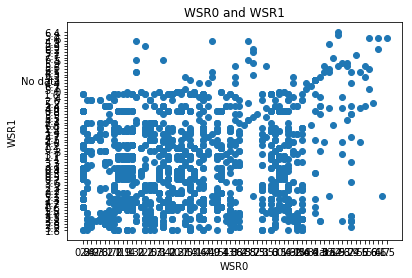

In [61]:
# create a scatter plot
import matplotlib.pyplot as plt
plt.scatter(ozone_data.WSR0, ozone_data.WSR1)
plt.title('WSR0 and WSR1')
plt.xlabel('WSR0')
plt.ylabel('WSR1')
plt.show()

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.